# Stroop effect
Udacity  
Data Science Nano Degree  
Project 1  
Philipp Vogler  
October 2016  

## Questions  

### Q1. What is our independent variable?   
Congruency of the words with the color of the ink

### What is our dependent variable?  
> “time it takes to name the ink colors”

### Q2a. What is an appropriate set of hypotheses for this task?  
The description of the Stroop effect suggests, that it is harder to name incongruent words (ink color is not the word). A harder task should take mire time to for fill. 

**Null - Hypothesis:  **
There **no** significant difference between the time it takes to name congruent words and incongruent words correctly.

H<sub>null</sub>: µ<sub>incon</sub> = µ<sub>con</sub>

**Alt.- Hypothesis:  **
There a significant difference between the time it takes to name congruent words and incongruent words correctly.

H<sub>alt</sub>: µ<sub>incon</sub> ≠ µ<sub>con</sub>


### Q2b. What kind of statistical test do you expect to perform?  
Hypothesis testing with a dependend t-test with paird examples.

In [10]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data import
path = r'/Users/philipp/Desktop/DS/Projects/Stroop_effect/stroopdata.csv'

dataFrame = pd.read_csv(path)
dataFrame

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### Q3. Descriptive Statistics

In [3]:
# Despriptive statistics
dataFrame.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


### Q4. Plot

Populating the interactive namespace from numpy and matplotlib


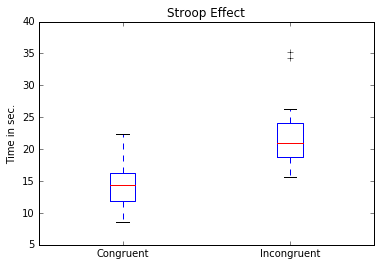

In [4]:
# Plot
%pylab inline
dataFrame.plot.box()

plt.ylabel("Time in sec.")
plt.title("Stroop Effect")

While the congruent distribution is skewed toward shorter times, the incongruent distribution is more evenly distributed (outliers notwithstanding). There are two outliers around 35 seconds. The incongruent word condition exercise takes about 5 seconds longer on average.

### Q5. Test

**Dependend t-test with paird examples**  

In [21]:
# t-Test
#ttost_paired(x1, x2, low, upp[, transform, ...])	test of (non-)equivalence for two dependent, paired sample

# Means
print('Congruent Mean: {}'.format(dataFrame.Congruent.mean()))
print('Incongruent Mean: {} '.format(dataFrame.Incongruent.mean()))

# Point Estimat
point_estimat = dataFrame.Congruent.mean()-dataFrame.Incongruent.mean()
print('Point Estimat: {}'.format(point_estimat))

# Differences
dataFrame['Differences'] = dataFrame.Congruent - dataFrame.Incongruent

# Average Difference
print('Average Difference: {}'.format(dataFrame.Differences.mean()))

# Count
count = dataFrame.Congruent.count()
print('Count: {}'.format(count))

# Degrees of Freedom
dof = count - 1
print('Degrees of Freedom: {}'.format(dof))

# Standard Diviation of Differneces
std = dataFrame.Differences.std(ddof = dof)
print('Standard Diviation of Differences: {}'.format(std))

# t-Statistic
t_statistic = point_estimat / (std / sqrt(count))
print('t-statistic: {}'.format(t_statistic))

# Test
print('Test: t_statistic < t_critical: {}'.format(t_statistic < -2.069))
print('Test: t_statistic > t_critical: {}'.format(t_statistic > 2.069))

Congruent Mean: 14.051125
Incongruent Mean: 22.0159166667 
Point Estimat: -7.96479166667
Average Difference: -7.96479166667
Count: 24
Degrees of Freedom: 23
Standard Diviation of Differences: 23.3308902522
t-statistic: -1.67243300877
Test: t_statistic < t_critical: False
Test: t_statistic > t_critical: False


#### What is your confidence level and your critical statistic value?  
alpha = 0.05  
CI = 95%  
t_critical =  2.069 / -2.069 (from t-table)

#### Do you reject the null hypothesis or fail to reject it?  
I fail to reject the null hypothesis

#### Did the results match up with your expectations?  
The distribution overlap for about half of the range (outliers notwithstanding). So this result was expected.

## Sources:
- [Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect)
- [Pandas Documentation](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.plot.box.html?highlight=box%20plot#pandas.DataFrame.plot.box)
- [Matplotlib Documentation](http://matplotlib.org/examples/statistics/boxplot_demo.html)
- [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)